# Comparisons with competitor algorithms

## Environmentr Setup

In [1]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore

import matplotlib.pyplot as plt  # type: ignore
from matplotlib.ticker import MaxNLocator  # type: ignore

from sklearn.manifold import TSNE  # type: ignore
from sklearn.decomposition import PCA  # type: ignore
from sklearn.preprocessing import StandardScaler  # type: ignore

from sklearn.model_selection import train_test_split  # type: ignore
from sklearn.linear_model import LinearRegression  # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import json
import lightgbm as lgb

from matplotlib.ticker import FuncFormatter

dataset_params = {
        "SIFT100M": {
            "M": 32,
            "efC": 500,
            "efS": 500,
            "color": "lightblue",
            "marker": "o",
            "li": 1,
            "label": "SIFT100M"
        },
        "DEEP100M": {
            "M": 32,
            "efC": 500,
            "efS": 750,
            "color": "plum",
            "marker": "x",  
            "li": 1 ,
            "label": "DEEP100M"
        },
        "T2I100M": {
            "M": 80,
            "efC": 1000,
            "efS": 2500,
            "color": "rosybrown",
            "marker": "d",
            "li": 2,
            "label": "T2I100M"
        },
        "GLOVE100": {
            "M": 16,
            "efC": 500,
            "efS": 500,
            "color": "orange",
            "marker": "^",
            "li": 1,
            "label": "GLOVE1M"
        },
        "GIST1M": {
            "M": 32,
            "efC": 500,
            "efS": 1000,
            "color": "lightgreen",
            "marker": "s",
            "li": 1,
            "label": "GIST1M"
        },
    }

SEED = 42
s = 1000

def get_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target, ipi, mpi):
    return f"../../experiments/results/early-stop-testing/{ds_name}/k{k}/M{M}_efC{efC}_efS{efS}_qs{s}_tr{float(r_target):.2f}_ipi{ipi}_mpi{mpi}.txt"


def get_detailed_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target, ipi, mpi):
    return f"../../experiments/results/early-stop-testing/{ds_name}/k{k}/detailed/M{M}_efC{efC}_efS{efS}_qs{s}_tr{float(r_target):.2f}_ipi{ipi}_mpi{mpi}.txt"


def get_naive_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target):
    return f"../../experiments/results/naive-early-stop-testing/{ds_name}/k{k}/M{M}_efC{efC}_efS{efS}_qs{s}_tr{float(r_target):.2f}.txt"


def get_no_early_stop_dataset_name(M, efC, efS, s, ds_name, k):
    return f"../../experiments/results/no-early-stop/testing/{ds_name}/k{k}/M{M}_efC{efC}_efS{efS}_qs{s}.txt"


def get_laet_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target):
    return f"../../experiments/results/laet-early-stop-testing/{ds_name}/k{k}/M{M}_efC{efC}_efS{efS}_qs{s}_tr{float(r_target):.2f}.txt"


def get_classic_hnsw_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target):
    return f"../../experiments/results/classic-hnsw/{ds_name}/k{k}/M{M}_efC{efC}_efS{efS}_qs{s}_tr{float(r_target):.2f}.txt"


def get_optimal_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k):
    return f"../../experiments/results/no-early-stop/testing/{ds_name}/k{k}/detailed.M{M}_efC{efC}_efS{efS}_qs{s}.txt"


def get_heuristic_interval_conf_filename(version="v1"):
    return f"../../experiments/generated_json/heuristic_recommendations_params_{version}.json"


def get_testing_detailed_dataset_name(M, efC, efS, s, ds_name, k, logint): 
    return f"../../experiments/results/test_logging/{ds_name}/k{k}/M{M}_efC{efC}_efS{efS}_qs{s}_li{logint}.txt"


def get_model_name(M, ef, s, ds_name, k, logint, selected_features, n_estimators=100):
    return f"../../predictor_models/lightgbm/{ds_name}_M{M}_ef{ef}_s{s}_k{k}_nestim{n_estimators}_li{logint}_{selected_features}.txt"


def compute_P99(y_true, y_pred):
    y_diff = np.abs(y_true - y_pred)
    return np.percentile(y_diff, 99)

# Load the dataconf from a file:
interval_conf = {}
with open("../../experiments/generated_json/final_heuristic_adaptive_recommendations_params_ipidiv2_mpidiv10.json") as f:
    interval_conf = json.load(f)

print(interval_conf.keys(), interval_conf["SIFT100M"].keys(), interval_conf["SIFT100M"]["100"].keys())

# Load the laet conf
laet_multiplier_conf = {}
with open("../../experiments/generated_json/laet_tuning_results_memoryFalse_validationSize1000.json") as f:
    laet_multiplier_conf = json.load(f)

print(laet_multiplier_conf.keys(), laet_multiplier_conf["SIFT100M"].keys(), laet_multiplier_conf["SIFT100M"]["100"].keys(), laet_multiplier_conf["SIFT100M"]["100"]["0.8"])

# Load the classic hnsw/REM conf
classic_hnsw_conf = {}
with open("../../experiments/generated_json/classic_hnsw_tuning_results_memoryFalse_validationSize1000.json") as f:
    classic_hnsw_conf = json.load(f)

print(classic_hnsw_conf.keys(), classic_hnsw_conf["SIFT100M"].keys(), classic_hnsw_conf["SIFT100M"]["100"].keys(), classic_hnsw_conf["SIFT100M"]["100"]["0.8"])

algorithm_conf = {
    "Naive-Baseline": {
        "color": "black",
        "marker": "s",
        "label": "Baseline",
    },
    "LAET": {
        "color": "gray",
        "marker": "x",
        "label": "LAET",
    },
    "HNSW": {
        "color": "lightgray",
        "marker": "^",
        "label": "REM",
    },
    "DARTH": {
        "color": "tomato",
        "marker": "o",
        "label": "DARTH",
    },
}

PLOTS_DIR = "./../../experiments/revision-plots/"

algorithm_conf

dict_keys(['T2I100M', 'SIFT100M', 'GLOVE100', 'GIST1M', 'DEEP100M']) dict_keys(['10', '25', '50', '75', '100']) dict_keys(['0.80', '0.85', '0.90', '0.95', '0.99'])
dict_keys(['DEEP100M', 'SIFT100M', 'GIST1M', 'GLOVE100', 'T2I100M']) dict_keys(['10', '25', '50', '75', '100']) dict_keys(['0.8', '0.85', '0.9', '0.95', '0.99']) {'min_m': '0.25', 'avg_recall': 0.80089, 'total_experiments': 6, 'total_tuning_time': 23283.054817}
dict_keys(['DEEP100M', 'SIFT100M', 'GIST1M', 'GLOVE100', 'T2I100M']) dict_keys(['10', '25', '50', '75', '100']) dict_keys(['0.8', '0.85', '0.9', '0.95', '0.99']) {'min_efS': 75, 'avg_recall': 0.83069, 'total_experiments': 5, 'total_tuning_time': 22220.999734000005}


{'Naive-Baseline': {'color': 'black', 'marker': 's', 'label': 'Baseline'},
 'LAET': {'color': 'gray', 'marker': 'x', 'label': 'LAET'},
 'HNSW': {'color': 'lightgray', 'marker': '^', 'label': 'REM'},
 'DARTH': {'color': 'tomato', 'marker': 'o', 'label': 'DARTH'}}

## Tuning overhead experiment

Saved plot at ./../../experiments/revision-plots/tuning_overheads_LAET_k50.pdf


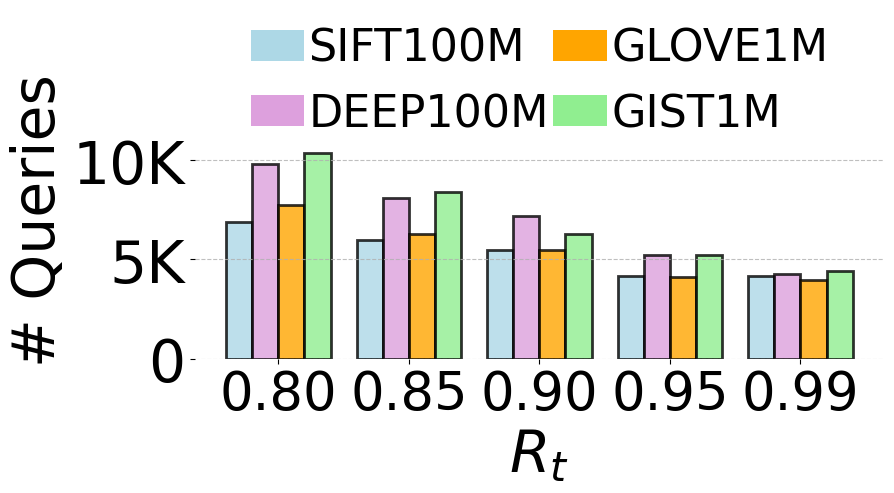

50: Average queries before LAET: 6175
50: Median queries before LAET: 5735
50: Max queries before LAET: 10376


In [2]:
all_datasets = ["SIFT100M", "DEEP100M", "GLOVE100", "GIST1M"]
all_k_values = ["50"]
all_r_targets = ["0.8", "0.85", "0.9", "0.95", "0.99"]

plt.rcParams.update({"font.size": 42})

def format_large_values(value, _):
    """Formats large values as K for thousands."""
    if value >= 1_000:
        return f"{value / 1_000:.1f}K" if value % 1_000 != 0 else f"{int(value / 1_000)}K"
    return str(int(value))

for k in all_k_values:
    all_queries_before_laet = [] # for all datasets to extract statistics

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.20
    x = np.arange(len(all_r_targets))
    
    for i, ds_name in enumerate(all_datasets):
        M = dataset_params[ds_name]["M"]
        efC = dataset_params[ds_name]["efC"]
        efS = dataset_params[ds_name]["efS"]
        
        if ds_name == "T2I100M":
            all_r_targets = ["0.8", "0.85", "0.9", "0.95"]
        else:
            all_r_targets = ["0.8", "0.85", "0.9", "0.95", "0.99"]
        
        laet_vals = []

        for r_target in all_r_targets:
            time_to_tune_LAET_ms = laet_multiplier_conf[ds_name][k][r_target]["total_tuning_time"]
            no_early_termination_df = pd.read_csv(get_no_early_stop_dataset_name(M, efC, efS, s, ds_name, k))
            no_early_termination_df = no_early_termination_df[no_early_termination_df["r"] >= float(r_target)]                
        
            ipi = interval_conf[ds_name][k][f"{float(r_target):.2f}"]["ipi"]
            mpi = interval_conf[ds_name][k][f"{float(r_target):.2f}"]["mpi"]
            darth_df = pd.read_csv(get_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target, ipi, mpi), usecols=["qid", "step", "dists", "inserts", "elaps_ms", "r_actual", "r_predicted", "r_predictor_calls", "r_predictor_time_ms", "RDE", "TDR", "NRS"])
            darth_df = darth_df[darth_df["r_actual"] >= float(r_target)]
            
            avg_time = darth_df["elaps_ms"].mean()
            queries_before_laet = time_to_tune_LAET_ms / avg_time

            laet_vals.append(queries_before_laet)
            all_queries_before_laet.append(queries_before_laet)
        
        offset = (i - len(all_datasets) / 2) * width + width / 2
        ax.bar(x + offset, laet_vals, width, label=ds_name, color=dataset_params[ds_name]["color"], alpha=0.8, edgecolor="black", linewidth=2)
    
    ax.set_xticks(x)
    ax.set_xticklabels(all_r_targets)
    ax.set_xlabel(r"$R_{t}$")
    ax.set_ylabel("# Queries")
    
    y_labels = [0, 5000, 10000]
    ax.set_yticks(y_labels)   
    
    # set limit for y axis to be at 10000
    ax.set_ylim(0, 14000) 
    
    
    x_labels = ["0.80", "0.85", "0.90", "0.95", "0.99"]
    ax.set_xticklabels(x_labels)
    
    # put 2-2 orientation for legend:
    legend_handles = [
        #Patch(facecolor=dataset_params[ds_name]["color"], label=ds_name) for ds_name in all_datasets
        # Replace GLOVE100 name with GLOVE1M
        Patch(facecolor=dataset_params["GLOVE100"]["color"], label="GLOVE1M") if ds_name == "GLOVE100" else Patch(facecolor=dataset_params[ds_name]["color"], label=ds_name) for ds_name in all_datasets
    ]
    ax.legend(handles=legend_handles, fontsize=32, ncol=2, handletextpad=0.1, handlelength=1.2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.5, 1), loc='center')
    ax.grid(axis="y", linestyle="--", alpha=0.8)
    ax.yaxis.set_major_formatter(FuncFormatter(format_large_values))
    for spine in ax.spines.values():
        spine.set_visible(False)
    #ax.legend()
    ax.tick_params(axis='x', labelsize=38)
    fig.tight_layout()
    
    filename = f"{PLOTS_DIR}tuning_overheads_LAET_k{k}.pdf"
    fig.savefig(filename, bbox_inches="tight")
    print(f"Saved plot at {filename}")
    plt.show()
    plt.close()
    
    print(f"{k}: Average queries before LAET: {round(np.mean(all_queries_before_laet))}")
    print(f"{k}: Median queries before LAET: {round(np.median(all_queries_before_laet))}")
    print(f"{k}: Max queries before LAET: {round(np.max(all_queries_before_laet))}")

## Comparison with Competitors

### Legend Generation

Saved legend at  ./../../experiments/revision-plots/competitors_bars_legend.pdf.pdf


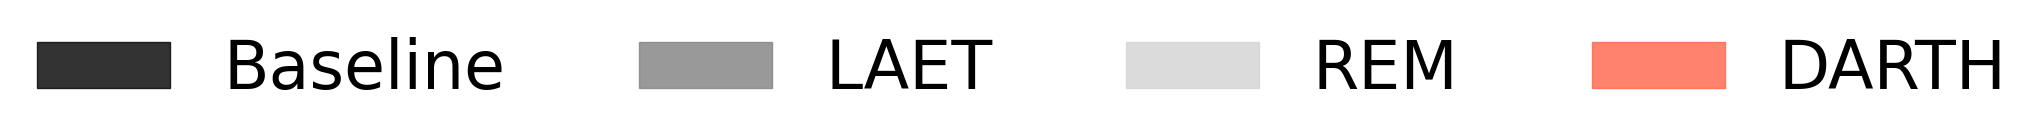

In [3]:
plt.rcParams.update({"font.size": 48})

fig_legend, ax_legend = plt.subplots(figsize=(8, 1))  # Adjust the figsize for better alignment
legend_elements = [
    Patch(facecolor=algorithm_conf[alg]["color"], edgecolor=algorithm_conf[alg]["color"], alpha=0.8, label=algorithm_conf[alg]["label"]) for alg in algorithm_conf.keys()
]
ax_legend.legend(handles=legend_elements, loc='center', ncol=4, frameon=False)
ax_legend.axis('off')
savefile = f"{PLOTS_DIR}competitors_bars_legend.pdf.pdf"
fig_legend.savefig(savefile, bbox_inches="tight")
print("Saved legend at ", savefile)
plt.show()

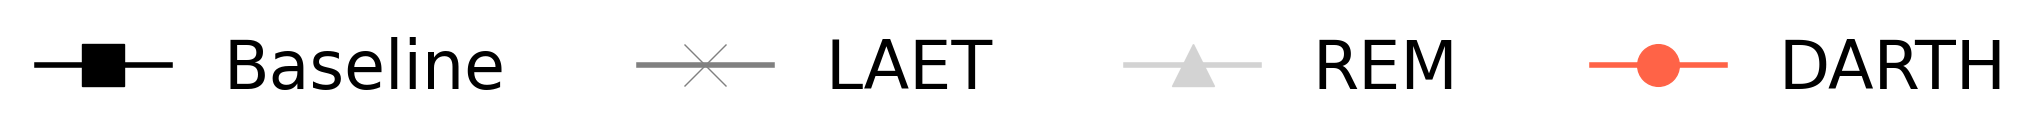

Saved legend at  ./../../experiments/revision-plots/competitors_lines_legend.pdf


In [4]:
plt.rcParams.update({"font.size": 48})

fig_legend, ax_legend = plt.subplots(figsize=(8, 1))  # Adjust the figsize for better alignment
legend_elements = [
    #Patch(facecolor=algorithm_conf[alg]["color"], edgecolor=algorithm_conf[alg]["color"], alpha=0.8, label=algorithm_conf[alg]["label"]) for alg in algorithm_conf.keys()
    Line2D([0], [0], color=algorithm_conf[alg]["color"], marker=algorithm_conf[alg]["marker"], markersize=30, linewidth=4, label=algorithm_conf[alg]["label"]) for alg in algorithm_conf.keys()
]
ax_legend.legend(handles=legend_elements, loc='center', ncol=4, frameon=False)
ax_legend.axis('off')
savefile = f"{PLOTS_DIR}competitors_lines_legend.pdf"
fig_legend.savefig(f"{savefile}", bbox_inches="tight")
plt.show()
print("Saved legend at ", savefile)

Saved legend at ./../../experiments/revision-plots/hnsw_darth_only_competitors_bars_legend.pdf


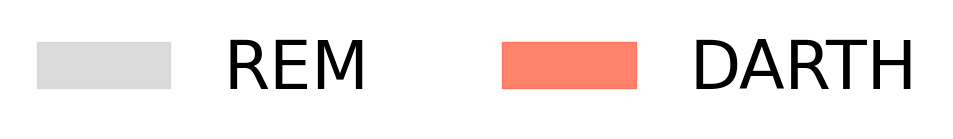

In [5]:
plt.rcParams.update({"font.size": 48})

fig_legend, ax_legend = plt.subplots(figsize=(8, 1))  # Adjust the figsize for better alignment
legend_elements = [
    Patch(facecolor=algorithm_conf[alg]["color"], edgecolor=algorithm_conf[alg]["color"], alpha=0.8, label=algorithm_conf[alg]["label"]) for alg in ["HNSW", "DARTH"]
]
ax_legend.legend(handles=legend_elements, loc='center', ncol=4, frameon=False)
ax_legend.axis('off')
savefile = f"{PLOTS_DIR}hnsw_darth_only_competitors_bars_legend.pdf"
fig_legend.savefig(savefile, bbox_inches="tight")
print(f"Saved legend at {savefile}")
plt.show()

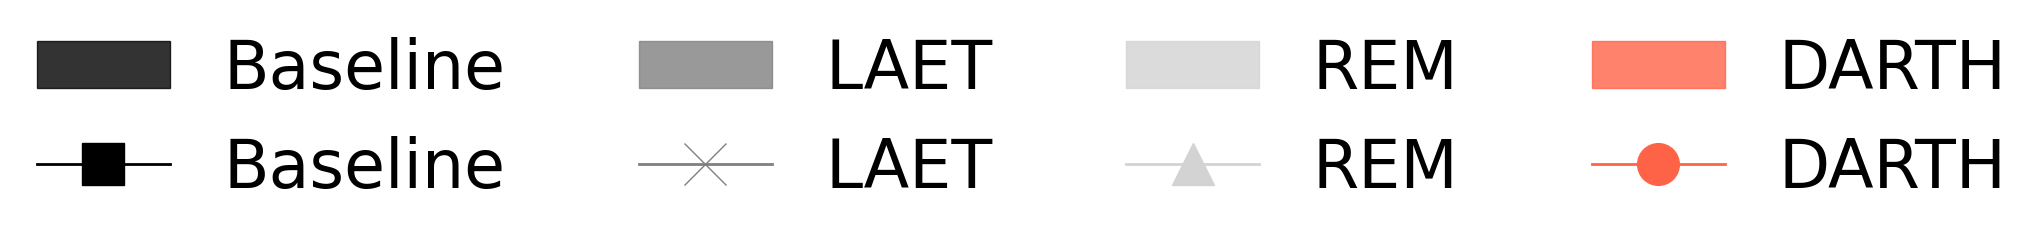

In [6]:
def create_unified_legend(algorithm_conf):
    """
    Generates a unified legend for bar and line plots.

    Args:
        algorithm_conf: A dictionary containing the following keys for each algorithm:
            - "color": Color of the bar or line.
            - "marker": Marker style for line plots (e.g., 'o', 's', 'x').
            - "label": Label for the algorithm.

    Returns:
        fig_legend: Figure object containing the legend.
    """

    plt.rcParams.update({"font.size": 48})

    fig_legend, ax_legend = plt.subplots(figsize=(8, 1))

    legend_elements = []
    for alg in algorithm_conf.keys():
        legend_elements.append(
            Patch(facecolor=algorithm_conf[alg]["color"], 
                  edgecolor=algorithm_conf[alg]["color"], 
                  alpha=0.8, 
                  label=f"{algorithm_conf[alg]['label']}"))
        
        legend_elements.append(
            Line2D([0], [0], 
                   color=algorithm_conf[alg]["color"], 
                   marker=algorithm_conf[alg]["marker"], 
                   markersize=30, 
                   linewidth=2, 
                   label=f"{algorithm_conf[alg]['label']}")
            )
        

    ax_legend.legend(handles=legend_elements, loc='center', ncol=4, frameon=False)
    ax_legend.axis('off')

    return fig_legend

fig_legend = create_unified_legend(algorithm_conf)
fig_legend.savefig(f"{PLOTS_DIR}/unified_competitor_legend.pdf", bbox_inches="tight") 

### Query Distribution Histograms

avg recall Naive-Baseline: 0.9444263959390863 | rqt Naive-Baseline: 334 | min recall Naive-Baseline: 0.46
avg recall LAET: 0.9562030456852794 | rqt LAET: 327 | min recall LAET: 0.46
avg recall HNSW: 0.9587208121827412 | rqt HNSW: 282 | min recall HNSW: 0.54
avg recall DARTH: 0.9700710659898477 | rqt DARTH: 225 | Min recall DARTH: 0.8000000000000002
Saved plot at ./../../experiments/revision-plots/competitor_histogram_DEEP100M_k50_rt0.95.pdf


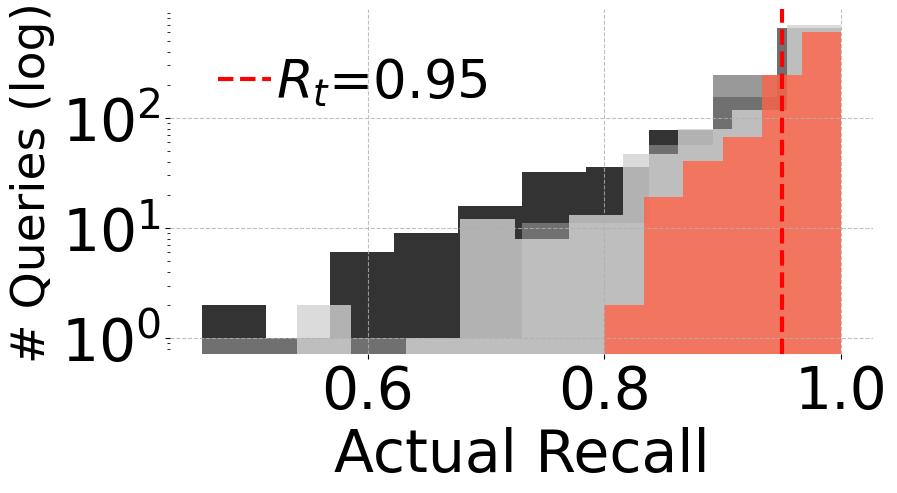

avg recall Naive-Baseline: 0.9323684210526316 | rqt Naive-Baseline: 412 | min recall Naive-Baseline: 0.46
avg recall LAET: 0.9613562753036438 | rqt LAET: 294 | min recall LAET: 0.7399999999999999
avg recall HNSW: 0.967085020242915 | rqt HNSW: 231 | min recall HNSW: 0.64
avg recall DARTH: 0.9615182186234817 | rqt DARTH: 298 | Min recall DARTH: 0.78
Saved plot at ./../../experiments/revision-plots/competitor_histogram_SIFT100M_k50_rt0.95.pdf


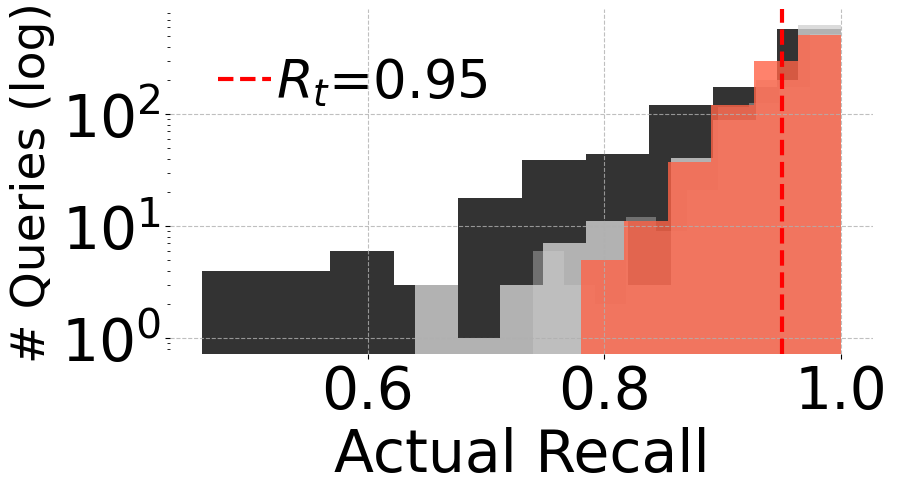

avg recall Naive-Baseline: 0.9651239669421487 | rqt Naive-Baseline: 216 | min recall Naive-Baseline: 0.12
avg recall LAET: 0.9552892561983471 | rqt LAET: 339 | min recall LAET: 0.68
avg recall HNSW: 0.9644628099173556 | rqt HNSW: 231 | min recall HNSW: 0.54
avg recall DARTH: 0.9620867768595042 | rqt DARTH: 296 | Min recall DARTH: 0.7799999999999999
Saved plot at ./../../experiments/revision-plots/competitor_histogram_GLOVE100_k50_rt0.95.pdf


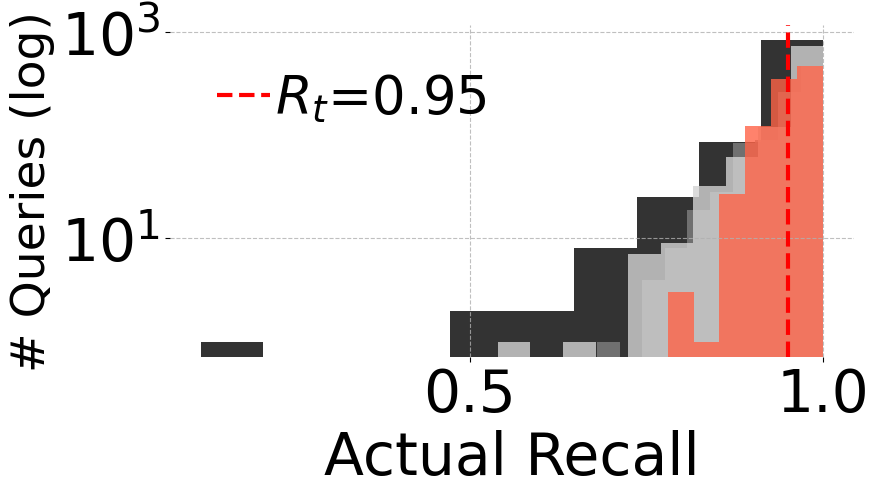

avg recall Naive-Baseline: 0.9436639676113361 | rqt Naive-Baseline: 413 | min recall Naive-Baseline: 0.66
avg recall LAET: 0.9521255060728745 | rqt LAET: 395 | min recall LAET: 0.68
avg recall HNSW: 0.9572672064777329 | rqt HNSW: 327 | min recall HNSW: 0.72
avg recall DARTH: 0.9632793522267207 | rqt DARTH: 284 | Min recall DARTH: 0.7799999999999999
Saved plot at ./../../experiments/revision-plots/competitor_histogram_GIST1M_k50_rt0.95.pdf


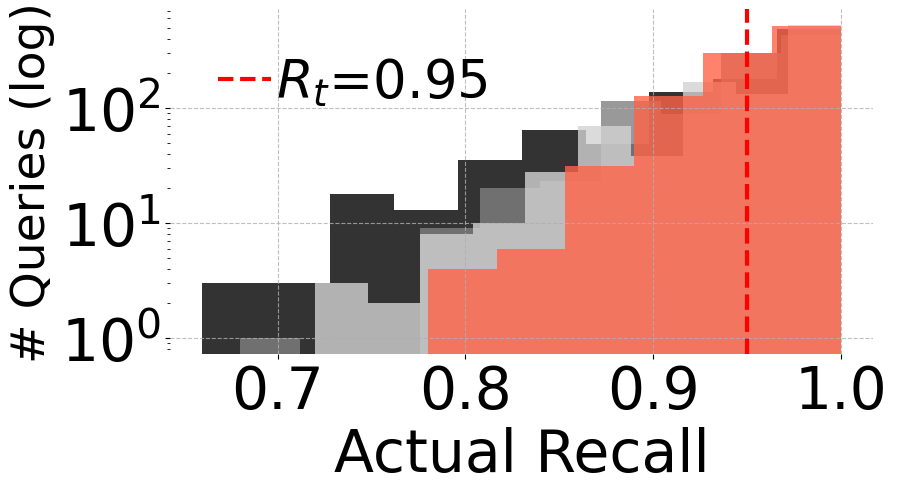

In [8]:
all_datasets = ["DEEP100M", "SIFT100M", "GLOVE100", "GIST1M"]
all_k_values = ["50"]#
all_r_targets = ["0.95"]

versus_algos = ["Naive-Baseline", "LAET", "HNSW"] # or LAET, Baseline]

plt.rcParams.update({"font.size": 42})
bar_width = 0.2
s = 1000

for i, ds_name in enumerate(all_datasets):
    M, efS, efC = dataset_params[ds_name]["M"], dataset_params[ds_name]["efS"], dataset_params[ds_name]["efC"]
    for r_target in all_r_targets:
        for k in all_k_values:
            ipi, mpi = interval_conf[ds_name][k][f"{float(r_target):.2f}"]["ipi"], interval_conf[ds_name][k][f"{float(r_target):.2f}"]["mpi"]
            f_r_target = float(r_target)
                    
            no_early_stop_df = pd.read_csv(f"../../experiments/results/no-early-stop/testing/{ds_name}/k{k}/M{M}_efC{efC}_efS{efS}_qs{s}.txt", usecols=["qid", "step", "dists", "inserts", "elaps_ms", "r", "RDE", "TDR", "NRS"])
            no_early_stop_df = no_early_stop_df[no_early_stop_df["r"] >= f_r_target]              
                    
            cefs = classic_hnsw_conf[ds_name][k][r_target]["min_efS"]
            hnsw_df = pd.read_csv(get_classic_hnsw_early_stop_testing_dataset_name(M, efC, classic_hnsw_conf[ds_name][k][r_target]["min_efS"], s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "r", "RDE", "TDR", "NRS"])
            darth_df = pd.read_csv(get_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target, ipi, mpi), usecols=["qid", "step", "dists", "inserts", "elaps_ms", "r_actual", "r_predicted", "r_predictor_calls", "r_predictor_time_ms", "RDE", "TDR", "NRS"])
            naive_df = pd.read_csv(get_naive_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "r", "RDE", "TDR", "NRS"])
            laet_df = pd.read_csv(get_laet_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "predicted_distance_calcs", "r", "RDE", "TDR", "NRS"])
            
            comp_versus = {
                "LAET": laet_df,
                "HNSW": hnsw_df,
                "Naive-Baseline": naive_df,
            }
            
            fig, ax = plt.subplots(figsize=(10,6))
            
            for versus_algo in versus_algos:
                competitor_df = comp_versus[versus_algo]
                competitor_df = competitor_df[competitor_df["qid"].isin(no_early_stop_df["qid"])] 
                recall_competitor = competitor_df["r"].mean()
                competitor_rqt = competitor_df[competitor_df["r"] < f_r_target].shape[0]
                ax.hist(competitor_df["r"], alpha=0.8, label="", color=algorithm_conf[versus_algo]["color"])#, bins=20)
                print(f"avg recall {versus_algo}: {recall_competitor} | rqt {versus_algo}: {competitor_rqt} | min recall {versus_algo}: {competitor_df['r'].min()}")            
            
            darth_df = darth_df[darth_df["qid"].isin(no_early_stop_df["qid"])]
            recall_darth = darth_df["r_actual"].mean()
            speedup_vs_no_early_stop = no_early_stop_df["elaps_ms"].mean() / darth_df["elaps_ms"].mean()
            darth_rqt = darth_df[darth_df["r_actual"] < f_r_target].shape[0]
            print(f"avg recall DARTH: {recall_darth} | rqt DARTH: {darth_rqt} | Min recall DARTH: {darth_df['r_actual'].min()}")
            
            ax.hist(darth_df["r_actual"], alpha=0.8, label="", color=algorithm_conf["DARTH"]["color"], bins=6)
            rt_str = r"$R_{t}$"
            ax.axvline(x=f_r_target, color="red", linestyle="--", label=f"{rt_str}={f_r_target}", linewidth=3)
            ax.set_xlabel("Actual Recall")
            ax.set_ylabel("# Queries (log)", fontsize=34)
            ax.grid(alpha=0.8, linestyle="--") 
            ax.legend(fontsize=38, frameon=False, handletextpad=0.1, handlelength=1.0, columnspacing=0.3)   
            ax.set_yscale("log")     
            for spine in ax.spines.values():
                spine.set_visible(False)
            fig.tight_layout()
            savefile = f"{PLOTS_DIR}competitor_histogram_{ds_name}_k{k}_rt{r_target}.pdf"
            fig.savefig(savefile, format="pdf", bbox_inches = 'tight')
            print(f"Saved plot at {savefile}")
            plt.show()

### Visualize the Approximate Metrics

In [10]:
def rqut_calculator(df, s, r_target, recall_col="r"):
    recalls = df[recall_col].round(2)
    rqut = len(recalls[recalls < r_target]) / s
    return rqut
    
def rde_calculator(df, s, r_target, recall_col="r"):
    return df["RDE"].mean()

def tde_calculator(df, s, r_target, recall_col="r"):
    return df["TDR"].mean()

def nrs_rev_calculator(df, s, r_target, recall_col="r"):
    return 1/df["NRS"].mean()

def time_calculator(df, s, r_target, recall_col="r"):
    return df["elaps_ms"].mean()

def dist_calculation(df, s, r_target, recall_col="r"):
    return df["dists"].mean()

def p99_calculation(df, s, r_target, recall_col="r"):
    below_df = df[df[recall_col] < r_target]
    error = np.abs(below_df[recall_col] - r_target)
    return np.percentile(error, 99)

def error_mean_calculation(df, s, r_target, recall_col="r"):
    below_df = df[df[recall_col] < r_target]    
    return below_df[recall_col].mean()

def worst_errors_calculation(df, s, r_target, recall_col="r"):
    below_df = df[df[recall_col] < r_target]    
    return below_df[recall_col].max()

def worst_1perc_errors_mean_calculation(df, s, r_target, recall_col="r"):
    # Filter entries below the target recall
    below_df = df[df[recall_col] < r_target].copy()
    
    # Calculate the error as the absolute difference
    below_df["error"] = abs(r_target - below_df[recall_col])
    
    # Sort the DataFrame by the error in descending order
    sorted_below_df = below_df.sort_values(by="error", ascending=False)
    
    # Calculate the top 1% of the worst errors
    num_entries = len(sorted_below_df)
    worst_1_percent_count = max(1, int(0.01 * num_entries))  # At least 1 entry
    
    # Select the worst 1% errors and calculate their mean
    worst_1_perc_mean = sorted_below_df["error"].head(worst_1_percent_count).mean()
    
    return worst_1_perc_mean

def qps_calculator(df, s, r_target, recall_col="r"):
    average_time_ms = df["elaps_ms"].mean()
    average_time_seconds = average_time_ms / 1000
    qps = 1 / average_time_seconds
    return qps
    
quality_measures = {
    "RQUT": {
        "label": "RQUT",
        "calculator": rqut_calculator,
        "type": "bar"
    },
    "RDE": {
        "label": "RDE",
        "calculator": rde_calculator,
        "type": "bar"
    },
    "TDR": {
        "label": "TDR",
        "calculator": tde_calculator,
        "type": "bar"
    },
    "NRS_rev": {
        "label": r"$NRS^{-1}$",
        "calculator": nrs_rev_calculator,
        "type": "bar"
    },
    "Time": {
        "label": "Time (ms)",
        "calculator": time_calculator,
        "type": "line"
    },
    "Dist": {
        "label": "Dists",
        "calculator": dist_calculation,
        "type": "line"
    },
    "p99": {
        "label": r"$P99$",
        "calculator": p99_calculation,
        "type": "bar"
    },
    #"ErrorMean": {
    #    "label": "Error Mean",
    #    "calculator": error_mean_calculation,
    #    "type": "bar"
    #},
    #"WorstErrors": {
    #    "label": "Worst Errors",
    #    "calculator": worst_errors_calculation,
    #    "type": "bar"
    #},
    "Worst1perc": {
        "label": "Worst 1%",
        "calculator": worst_1perc_errors_mean_calculation,
        "type": "bar"
    },
    "QPS": {
        "label": "QPS",
        "calculator": qps_calculator,
        "type": "line"
    }
}

Saved plot at ./../../experiments/revision-plots/comparisons_Worst1perc_k50_SIFT100M.pdf


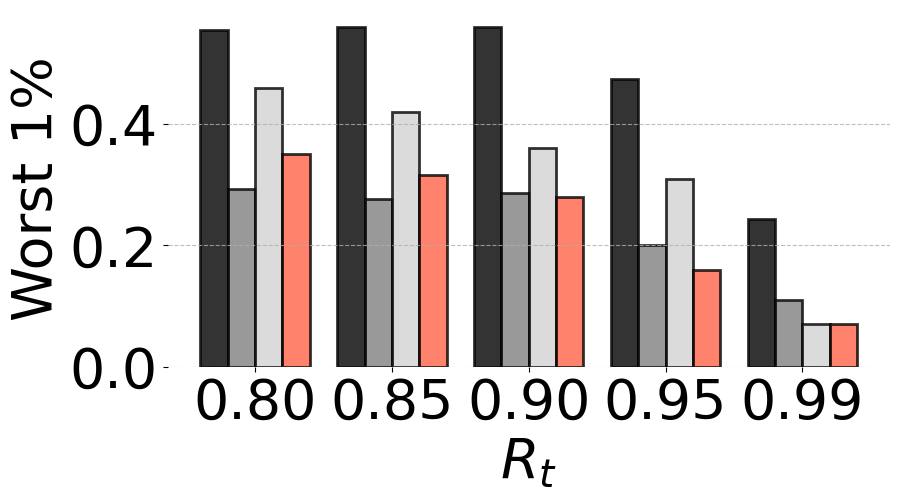

Saved plot at ./../../experiments/revision-plots/comparisons_Worst1perc_k50_DEEP100M.pdf


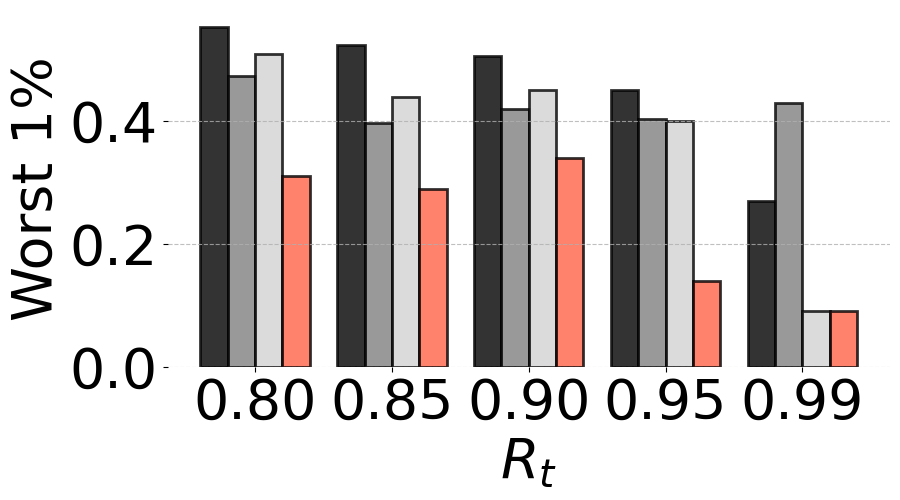

Saved plot at ./../../experiments/revision-plots/comparisons_Worst1perc_k50_GLOVE100.pdf


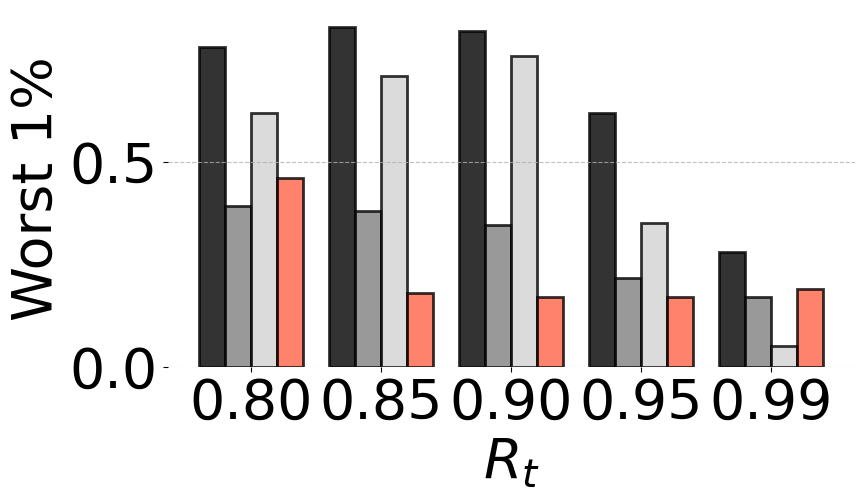

Saved plot at ./../../experiments/revision-plots/comparisons_Worst1perc_k50_GIST1M.pdf


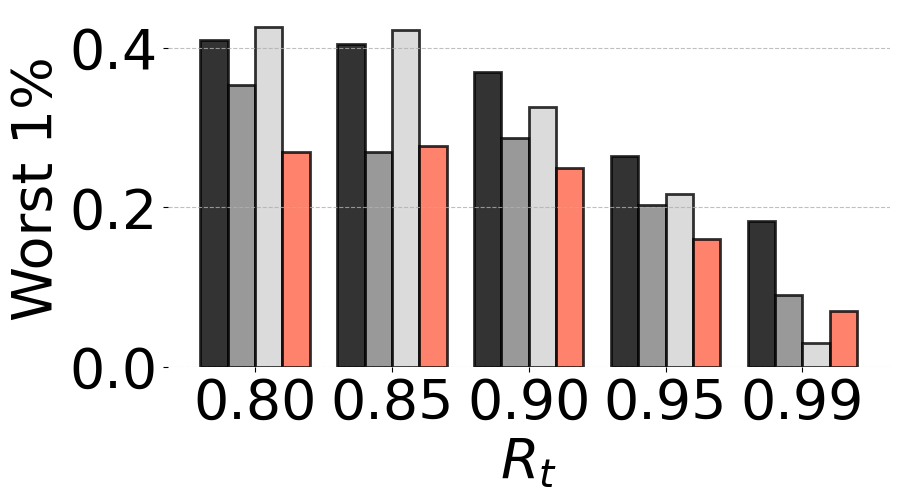

Worst1perc improvement of DARTH vs LAET: 0.79
Worst1perc improvement of DARTH vs HNSW: 0.89
Worst1perc improvement of DARTH vs Baseline: 0.49
Median improvement overall: 0.7882122342268005
Average improvement overall: 0.7215652309984947


In [11]:
all_datasets = ["SIFT100M", "DEEP100M", "GLOVE100", "GIST1M"]
all_k_values = ["50"]
all_r_targets = ["0.8", "0.85", "0.9", "0.95", "0.99"]
all_measures = ["Worst1perc"]#, "RDE", "p99", "RQUT", "NRS_rev"]#, "RDE", "NRS_rev", "p99", "Worst1perc"]

competitors_to_use = ["Naive-Baseline", "LAET", "HNSW", "DARTH"]

plt.rcParams.update({"font.size": 40})
bar_width = 0.2

for measure in all_measures:
    measure_label = quality_measures[measure]["label"]
    measure_calculator = quality_measures[measure]["calculator"]
    
    average_measure_improvement_DARTH_vs_LAET = 0
    average_measure_improvement_DARTH_vs_HNSW = 0
    average_measure_improvement_DARTH_vs_baseline = 0
    average_measure_calc_num = 0
    
    for i, ds_name in enumerate(all_datasets):
        M, efS, efC = dataset_params[ds_name]["M"], dataset_params[ds_name]["efS"], dataset_params[ds_name]["efC"]
        naive_values, DARTH_values, LAET_values, HNSW_values = [], [], [], []
        naive_errors, DARTH_errors, LAET_errors, HNSW_errors = [], [], [], []  # For storing standard errors
        
        if ds_name == "T2I100M":
            all_r_targets = ["0.8", "0.85", "0.9", "0.95"]
        else:
            all_r_targets = ["0.8", "0.85", "0.9", "0.95", "0.99"]
        
        for r_target in all_r_targets:
            DARTH_values_k = []
            LAET_values_k = []
            naive_values_k = []
            HNSW_values_k = []
            
            for k in all_k_values:
                ipi, mpi = interval_conf[ds_name][k][f"{float(r_target):.2f}"]["ipi"], interval_conf[ds_name][k][f"{float(r_target):.2f}"]["mpi"]
                f_r_target = float(r_target)
                
                no_early_stop_df = pd.read_csv(get_no_early_stop_dataset_name(M, efC, efS, s, ds_name, k), usecols=["qid", "step", "dists", "inserts", "elaps_ms", "r", "RDE", "TDR", "NRS"])
                no_early_stop_df = no_early_stop_df[no_early_stop_df["r"] >= f_r_target]                
                
                darth_df = pd.read_csv(get_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target, ipi, mpi), usecols=["qid", "step", "dists", "inserts", "elaps_ms", "r_actual", "r_predicted", "r_predictor_calls", "r_predictor_time_ms", "RDE", "TDR", "NRS"])
                naive_df = pd.read_csv(get_naive_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "r", "RDE", "TDR", "NRS"])
                laet_df = pd.read_csv(get_laet_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "predicted_distance_calcs", "r", "RDE", "TDR", "NRS"])
                hnsw_df = pd.read_csv(get_classic_hnsw_early_stop_testing_dataset_name(M, efC, classic_hnsw_conf[ds_name][k][r_target]["min_efS"], s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "r", "RDE", "TDR", "NRS"])
                
                darth_df = darth_df[darth_df["qid"].isin(no_early_stop_df["qid"])]
                naive_df = naive_df[naive_df["qid"].isin(no_early_stop_df["qid"])]
                laet_df = laet_df[laet_df["qid"].isin(no_early_stop_df["qid"])]
                hnsw_df = hnsw_df[hnsw_df["qid"].isin(no_early_stop_df["qid"])]
                
                measure_darth = measure_calculator(darth_df, s, f_r_target, recall_col="r_actual")
                measure_laet = measure_calculator(laet_df, s, f_r_target)
                measure_naive = measure_calculator(naive_df, s, f_r_target)
                measure_hnsw = measure_calculator(hnsw_df, s, f_r_target)
                
                DARTH_values_k.append(measure_darth)
                LAET_values_k.append(measure_laet)
                naive_values_k.append(measure_naive)
                HNSW_values_k.append(measure_hnsw)
                
                # Calculate relative improvement
                average_measure_improvement_DARTH_vs_LAET += measure_darth / measure_laet
                average_measure_improvement_DARTH_vs_baseline += measure_darth / measure_naive
                average_measure_improvement_DARTH_vs_HNSW += measure_darth / measure_hnsw
                average_measure_calc_num += 1

            naive_values.append(np.mean(naive_values_k))
            DARTH_values.append(np.mean(DARTH_values_k))
            LAET_values.append(np.mean(LAET_values_k))
            HNSW_values.append(np.mean(HNSW_values_k))

            # Calculate standard error for each set of values
            naive_errors.append(np.std(naive_values_k) / np.sqrt(len(naive_values_k)))
            DARTH_errors.append(np.std(DARTH_values_k) / np.sqrt(len(DARTH_values_k)))
            LAET_errors.append(np.std(LAET_values_k) / np.sqrt(len(LAET_values_k)))
            HNSW_errors.append(np.std(HNSW_values_k) / np.sqrt(len(HNSW_values_k)))

        fig, ax = plt.subplots(figsize=(10,6))

        x = np.arange(len(all_r_targets))        
        competitor_dict = {
            "HNSW": HNSW_values,
            "LAET": LAET_values,
            "Naive-Baseline": naive_values,
            "DARTH": DARTH_values
        }
        
        if quality_measures[measure]["type"] == "bar":
            num_competitors = len(competitors_to_use)
            offset = (0 - num_competitors / 2) * bar_width + bar_width / 2
            for j, competitor in enumerate(competitors_to_use):
                ax.bar(x + offset + j * bar_width, competitor_dict[competitor], width=bar_width, label=competitor, color=algorithm_conf[competitor]["color"], alpha=0.8, edgecolor="black", linewidth=2)
            ax.grid(alpha=0.8, axis="y", linestyle="--")
        else:
            num_competitors = len(competitors_to_use)
            offset = (0 - num_competitors / 2) * bar_width + bar_width / 2
            for j, competitor in enumerate(competitors_to_use):
                ax.plot(x, competitor_dict[competitor], color=algorithm_conf[competitor]["color"], marker=algorithm_conf[competitor]["marker"], label=algorithm_conf[competitor]["label"], markersize=15)
            ax.grid(alpha=0.8, linestyle="--")
        
        for spine in ax.spines.values():
            spine.set_visible(False)
        
        ax.set_xticks(np.arange(len(all_r_targets)))
        ax.set_xticklabels(all_r_targets)
        ax.set_xlabel(r"$R_t$")
        ax.set_ylabel(f"{measure_label}")
        #ax.tick_params(axis='x', labelsize=40)
        ax.set_xticklabels(["0.80", "0.85", "0.90", "0.95", "0.99"])

        fig.tight_layout()
        #ax.legend(fontsize=20, loc="upper right", borderpad=0.3, ncol=2)
        
        if len(all_k_values) == 1:
            savefile = f"{PLOTS_DIR}comparisons_{measure}_k{all_k_values[0]}_{ds_name}.pdf"
        else:
            savefile = f"{PLOTS_DIR}comparisons_{measure}_{ds_name}.pdf"
        fig.savefig(savefile, bbox_inches="tight")

        print(f"Saved plot at {savefile}")
        plt.show()
        plt.close(fig)
    
    average_measure_improvement_DARTH_vs_LAET = average_measure_improvement_DARTH_vs_LAET / average_measure_calc_num
    average_measure_improvement_DARTH_vs_HNSW = average_measure_improvement_DARTH_vs_HNSW / average_measure_calc_num    
    average_measure_improvement_DARTH_vs_baseline = average_measure_improvement_DARTH_vs_baseline / average_measure_calc_num
    print(f"{measure} improvement of DARTH vs LAET: {average_measure_improvement_DARTH_vs_LAET:.2f}")
    print(f"{measure} improvement of DARTH vs HNSW: {average_measure_improvement_DARTH_vs_HNSW:.2f}")
    print(f"{measure} improvement of DARTH vs Baseline: {average_measure_improvement_DARTH_vs_baseline:.2f}")
    
    all_average_improvements = [average_measure_improvement_DARTH_vs_LAET, average_measure_improvement_DARTH_vs_HNSW, average_measure_improvement_DARTH_vs_baseline]
    print(f"Median improvement overall: {np.median(all_average_improvements)}")
    print(f"Average improvement overall: {np.mean(all_average_improvements)}")
    

LAET [130.68787857116644, 94.5660722663857, 45.42552218197701, 14.815923436843768]
DARTH [39.98874377538194, 31.57325241926712, 22.319475330270077, 16.628446780406154]
HNSW [151.19376711795744, 104.3138785924245, 57.52772075122979, 11.679681985209273]
naive [115.056543612151, 80.24090819054027, 65.26756249551978, 46.52005892603296]
Saved plot at ../../experiments/plots/comparisons_actual_recall_QPS_k50_T2I100M.pdf


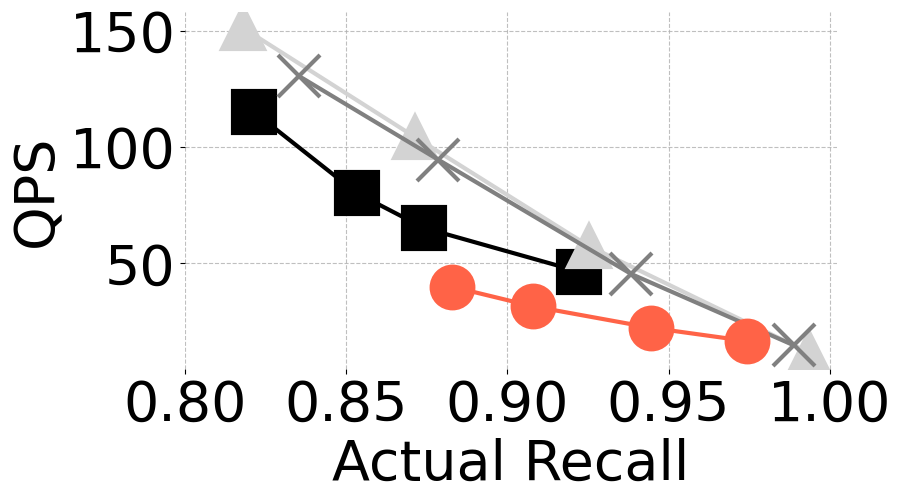

In [12]:
# QPS graphs but with the actual achieved recall (not the recall target)

all_datasets = ["T2I100M"]
all_k_values = ["50"]
all_r_targets = ["0.8", "0.85", "0.9", "0.95"]
all_measures = ["QPS"]

plt.rcParams.update({"font.size": 40})
bar_width = 0.2

for measure in all_measures:
    measure_label = quality_measures[measure]["label"]
    measure_calculator = quality_measures[measure]["calculator"]
    
    for i, ds_name in enumerate(all_datasets):
        M, efS, efC = dataset_params[ds_name]["M"], dataset_params[ds_name]["efS"], dataset_params[ds_name]["efC"]
        naive_values, DARTH_values, LAET_values, HNSW_values = [], [], [], []
        naive_values_achieved_recalls, DARTH_values_achieved_recalls, LAET_values_achieved_recalls, HNSW_values_achieved_recalls = [], [], [], []
        
        if ds_name == "T2I100M":
            all_r_targets = ["0.8", "0.85", "0.9", "0.95"]
        else:
            all_r_targets = ["0.8", "0.85", "0.9", "0.95", "0.99"]
        
        for r_target in all_r_targets:
            DARTH_values_k = []
            LAET_values_k = []
            naive_values_k = []
            HNSW_values_k = []
            
            DARTH_values_k_achieved_recalls = []
            LAET_values_k_achieved_recalls = []
            naive_values_k_achieved_recalls = []
            HNSW_values_k_achieved_recalls = []
            
            for k in all_k_values:
                ipi, mpi = interval_conf[ds_name][k][f"{float(r_target):.2f}"]["ipi"], interval_conf[ds_name][k][f"{float(r_target):.2f}"]["mpi"]
                f_r_target = float(r_target)
                
                no_early_stop_df = pd.read_csv(get_no_early_stop_dataset_name(M, efC, efS, s, ds_name, k), usecols=["qid", "step", "dists", "inserts", "elaps_ms", "r", "RDE", "TDR", "NRS"])
                no_early_stop_df = no_early_stop_df[no_early_stop_df["r"] >= f_r_target]                
                
                darth_df = pd.read_csv(get_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target, ipi, mpi), usecols=["qid", "step", "dists", "inserts", "elaps_ms", "r_actual", "r_predicted", "r_predictor_calls", "r_predictor_time_ms", "RDE", "TDR", "NRS"])
                naive_df = pd.read_csv(get_naive_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "r", "RDE", "TDR", "NRS"])
                laet_df = pd.read_csv(get_laet_early_stop_testing_dataset_name(M, efC, efS, s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "predicted_distance_calcs", "r", "RDE", "TDR", "NRS"])
                hnsw_df = pd.read_csv(get_classic_hnsw_early_stop_testing_dataset_name(M, efC, classic_hnsw_conf[ds_name][k][r_target]["min_efS"], s, ds_name, k, r_target), usecols=["qid", "elaps_ms", "dists", "r", "RDE", "TDR", "NRS"])
                
                darth_df = darth_df[darth_df["qid"].isin(no_early_stop_df["qid"])]
                naive_df = naive_df[naive_df["qid"].isin(no_early_stop_df["qid"])]
                laet_df = laet_df[laet_df["qid"].isin(no_early_stop_df["qid"])]
                hnsw_df = hnsw_df[hnsw_df["qid"].isin(no_early_stop_df["qid"])]
                
                achieved_recall_darth = darth_df["r_actual"].mean()
                achieved_recall_naive = naive_df["r"].mean()
                achieved_recall_laet = laet_df["r"].mean()
                achieved_recall_hnsw = hnsw_df["r"].mean()
                
                measure_darth = measure_calculator(darth_df, s, f_r_target, recall_col="r_actual")
                measure_laet = measure_calculator(laet_df, s, f_r_target)
                measure_naive = measure_calculator(naive_df, s, f_r_target)
                measure_hnsw = measure_calculator(hnsw_df, s, f_r_target)
                
                DARTH_values_k.append(measure_darth)
                LAET_values_k.append(measure_laet)
                naive_values_k.append(measure_naive)
                HNSW_values_k.append(measure_hnsw)
                
                DARTH_values_k_achieved_recalls.append(achieved_recall_darth)
                LAET_values_k_achieved_recalls.append(achieved_recall_laet)
                naive_values_k_achieved_recalls.append(achieved_recall_naive)
                HNSW_values_k_achieved_recalls.append(achieved_recall_hnsw)
                
                #print(f"ds={ds_name} k={k} rt={r_target} meas={measure_label} || DARTH: {measure_darth} LAET: {measure_laet} Naive: {measure_naive}")
            
            naive_values.append(np.mean(naive_values_k))
            DARTH_values.append(np.mean(DARTH_values_k))
            LAET_values.append(np.mean(LAET_values_k))
            HNSW_values.append(np.mean(HNSW_values_k))
            
            naive_values_achieved_recalls.append(np.mean(naive_values_k_achieved_recalls))
            DARTH_values_achieved_recalls.append(np.mean(DARTH_values_k_achieved_recalls))
            LAET_values_achieved_recalls.append(np.mean(LAET_values_k_achieved_recalls))
            HNSW_values_achieved_recalls.append(np.mean(HNSW_values_k_achieved_recalls))

        fig, ax = plt.subplots(figsize=(10,6))

        x = np.arange(len(all_r_targets))
        
        
        ax.plot(naive_values_achieved_recalls, naive_values, color=algorithm_conf["Naive-Baseline"]["color"], marker=algorithm_conf["Naive-Baseline"]["marker"], label=algorithm_conf["Naive-Baseline"]["label"], markersize=30, linewidth=3, markeredgewidth=3)
        ax.plot(HNSW_values_achieved_recalls, HNSW_values, color=algorithm_conf["HNSW"]["color"], marker=algorithm_conf["HNSW"]["marker"], label=algorithm_conf["HNSW"]["label"], markersize=30, linewidth=3, markeredgewidth=3)
        ax.plot(LAET_values_achieved_recalls, LAET_values, color=algorithm_conf["LAET"]["color"], marker=algorithm_conf["LAET"]["marker"], label=algorithm_conf["LAET"]["label"], markersize=30, linewidth=3, markeredgewidth=3)
        ax.plot(DARTH_values_achieved_recalls, DARTH_values, color=algorithm_conf["DARTH"]["color"], marker=algorithm_conf["DARTH"]["marker"], label=algorithm_conf["DARTH"]["label"], markersize=30, linewidth=3, markeredgewidth=3)
        ax.grid(alpha=0.8, linestyle="--")
        
        print("LAET", LAET_values)
        print("DARTH", DARTH_values)
        print("HNSW", HNSW_values)
        print("naive", naive_values)
        
        for spine in ax.spines.values():
            spine.set_visible(False)

        ax.set_xticks([0.80, 0.85, 0.90, 0.95, 1])
        ax.set_xlabel("Actual Recall")
        ax.set_ylabel(f"{measure_label}")
        
        fig.tight_layout()
        if len(all_k_values) == 1:
            filename = f"../../experiments/plots/comparisons_actual_recall_{measure}_k{all_k_values[0]}_{ds_name}.pdf"
        else:
            filename = f"../../experiments/plots/comparisons_actual_recall_{measure}_{ds_name}.pdf"
        fig.savefig(filename, bbox_inches="tight")

        print(f"Saved plot at {filename}")
        plt.show()

        plt.close(fig)
